Importar data

In [1]:
import pandas as pd
noSolutionDF = pd.read_csv('output_nosol - copia.csv')
solutionDF = pd.read_csv('output_sol - copia.csv')

Etiquetas

In [2]:
import numpy as np
noSolutionCount = noSolutionDF.shape[0]
solutionCount = solutionDF.shape[0]

print(noSolutionCount)
print(solutionCount)

noSolutionLabel = [0] * noSolutionCount 
solutionLabel = [1] * solutionCount 
labels = noSolutionLabel + solutionLabel

# Convierte la lista de listas a un arreglo numpy
Y = np.array(labels)

print(Y)
print(Y.shape)

1
1
[0 1]
(2,)


X tableros

In [3]:
def Rotate_90(tablero):
    return np.rot90(tablero, k=1)

def Rotate_180(tablero):
    return np.rot90(tablero, k=2)

def Rotate_270(tablero):
    return np.rot90(tablero, k=3)

def FlipX(tablero):
    return np.fliplr(tablero)

def FlipY(tablero):
    return np.flipud(tablero)

boards = []

for indice, fila in noSolutionDF.iterrows():
    tableros_en_celda = fila['Board'].replace("\r", "").split('\n')
    tableros_en_celda = list(filter(lambda x: x != '', tableros_en_celda))
    tablero_matriz = [list(fila) for fila in tableros_en_celda]
    boards.append(tablero_matriz)
  
    
print("El tamaño de la lista `boards` es:", len(boards))
for indice, fila in solutionDF.iterrows():
    tableros_en_celda = fila['Board'].replace("\r", "").split('\n')
    tableros_en_celda = list(filter(lambda x: x != '', tableros_en_celda))
    tablero_matriz = [list(fila) for fila in tableros_en_celda]
    boards.append(tablero_matriz)

# Data augmentation
'''aug_boards = []
for board in boards:
    board_np = np.array(board)
    aug_boards.append(board_np)  
    #aug_boards.append(Rotate_90(board_np))  
    aug_boards.append(Rotate_180(board_np)) 
    #aug_boards.append(Rotate_270(board_np))  
    aug_boards.append(FlipX(board_np))  
    aug_boards.append(FlipY(board_np))  

print("El tamaño de la lista `boards` es:", len(aug_boards))
with np.printoptions(threshold=np.inf):
    print(aug_boards[0])'''


# Imprie
'''for i, lista in enumerate(boards):
    print(f"Lista de tableros {i+1}:")
    for tablero in lista:
        print(tablero)
    print()  # Salto de línea entre listas de tablero'''

El tamaño de la lista `boards` es: 1


'for i, lista in enumerate(boards):\n    print(f"Lista de tableros {i+1}:")\n    for tablero in lista:\n        print(tablero)\n    print()  # Salto de línea entre listas de tablero'

Tableros a tensor

In [4]:
import numpy as np
import pandas as pd

def tablero_a_tensor(tablero):
    alto = len(tablero)
    ancho = len(tablero[0])
    tensor = np.zeros((alto, ancho, 3))
    for i in range(alto):
        for j in range(ancho):
            elemento = tablero[i][j]
            if elemento == '#':
                tensor[i, j, 0] = 1
            elif elemento == '@':
                tensor[i, j, 1] = 1
            elif elemento == ' ':
                tensor[i, j, 2] = 1

    return tensor


X = np.array([tablero_a_tensor(tablero) for tablero in boards])
with np.printoptions(threshold=np.inf):
    print(X)
print("Shape of X:", X.shape)


'''print("Shape of X:", X[0].shape)
print(len(X))
with np.printoptions(threshold=np.inf):
    print(X[0])'''

'''max_height = max(tensor.shape[0] for tensor in X)
max_width = max(tensor.shape[1] for tensor in X)
X_padded = np.ones((len(X), max_height, max_width, 7))

for idx, tensor in enumerate(X):
    height = tensor.shape[0]
    width = tensor.shape[1]
    X_padded[idx, :height, :width, :] = tensor

with np.printoptions(threshold=np.inf):
    print(X_padded[0])


print("Dimensiones de X_padded:", X_padded.shape)

# Verificar las dimensiones de X y y
#print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", Y.shape)'''

[[[[1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]]

  [[1. 0. 0.]
   [0. 0. 0.]
   [1. 0. 0.]]

  [[1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]]]


 [[[1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]]

  [[1. 0. 0.]
   [0. 1. 0.]
   [1. 0. 0.]]

  [[1. 0. 0.]
   [1. 0. 0.]
   [1. 0. 0.]]]]
Shape of X: (2, 3, 3, 3)


'max_height = max(tensor.shape[0] for tensor in X)\nmax_width = max(tensor.shape[1] for tensor in X)\nX_padded = np.ones((len(X), max_height, max_width, 7))\n\nfor idx, tensor in enumerate(X):\n    height = tensor.shape[0]\n    width = tensor.shape[1]\n    X_padded[idx, :height, :width, :] = tensor\n\nwith np.printoptions(threshold=np.inf):\n    print(X_padded[0])\n\n\nprint("Dimensiones de X_padded:", X_padded.shape)\n\n# Verificar las dimensiones de X y y\n#print("Dimensiones de X:", X.shape)\nprint("Dimensiones de y:", Y.shape)'

FSN

(3, 3, 3) 1 1 1


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3, 3, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 3, 3, 32)       │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 3, 3, 32)       │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 64)       │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 1)        │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 1)              │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,267 (106.51 KB)

 Trainable params: 27,267 (106.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 0.6988 - val_accuracy: 0.0000e+00 - val_loss: 0.6936
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0000e+00 - loss: 0.6933 - val_accuracy: 0.0000e+00 - val_loss: 0.6941
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.6921 - val_accuracy: 0.0000e+00 - val_loss: 0.6946
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.6916 - val_accuracy: 0.0000e+00 - val_loss: 0.6951
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.6911 - val_accuracy: 0.0000e+00 - val_loss: 0.6956
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.6907 - val_accuracy: 0.0000e+00 - val_loss: 0.6962
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.6902 - val_accuracy: 0.0000e+00 - val_loss: 0.6967
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.6897 - val_ac

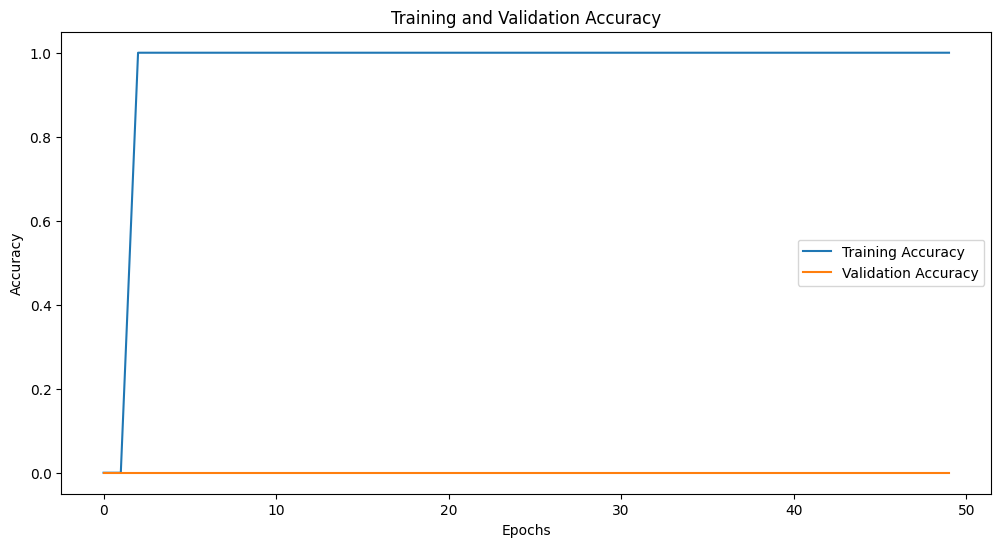

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Conv2D, GlobalMaxPooling2D,GlobalAveragePooling2D, Dense, MaxPooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23)
print(X_train[0].shape, len(Y_train), len(X_test), len(Y_test))

#(height, width, channels, batch)
input_shape = (3, 3, 3)  
inputs = Input(shape=input_shape)

# Arq
x = Conv2D(filters=32, kernel_size=2, activation='relu', padding='same')(inputs)
x = Conv2D(filters=32, kernel_size=2, activation='relu', padding='same')(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = Conv2D(filters=64, kernel_size=1, activation='relu', padding='same')(x)
x = Conv2D(filters=1, kernel_size=1, activation='relu', padding='same')(x)
x = GlobalMaxPooling2D()(x)
outputs = Dense(1, activation = "sigmoid")(x) # softmax output


model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
#model.fit(X_train, Y_train, epochs=300, batch_size=32, validation_data=(X_test, Y_test))

# History
history = model.fit(X_train, Y_train, epochs=50, batch_size=1, validation_data=(X_test, Y_test))

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
